In [25]:
import pandas as pd

df1 = pd.read_csv("../data/all_score_phase1_update.csv")
df2 = pd.read_csv("../data/all_score_phase2_update.csv")
df3 = pd.read_csv("../data/all_score_phase3_update.csv")
df4 = pd.read_csv("../data/all_score_phase4_update.csv")
df5 = pd.read_csv("../data/all_score_phase5_update.csv")

In [26]:
df = pd.read_csv("output_new.csv")
df_p1 = df[df['phase'] == 1]
df_p2 = df[df['phase'] == 2]
df_p3 = df[df['phase'] == 3]
df_p4 = df[df['phase'] == 4]
df_p5 = df[df['phase'] == 5]

In [27]:
df_p1 = df_p1.rename(columns={'len_40': 'len_40_1'})
df_p2 = df_p2.rename(columns={'len_40': 'len_40_2'})
df_p3 = df_p3.rename(columns={'len_40': 'len_40_3'})
df_p4 = df_p4.rename(columns={'len_40': 'len_40_4'})
df_p5 = df_p5.rename(columns={'len_40': 'len_40_5'})

In [28]:
temp1 = pd.merge(df_p1[['username', 'len_40_1']], df_p2[['username', 'len_40_2']], how='outer', on='username')
temp2 = pd.merge(df_p3[['username', 'len_40_3']], temp1, how='outer', on='username')
temp3 = pd.merge(df_p4[['username', 'len_40_4']], temp2, how='outer', on='username')
temp4 = pd.merge(df_p5[['username', 'len_40_5']], temp3, how='outer', on='username')
temp4

,username,len_40_5,len_40_4,len_40_3,len_40_1,len_40_2
0,mdecloedt,1.0,2.0,1.0,NaN,1.0
1,Jordan-Loeser,1.0,2.0,1.0,NaN,3.0
2,LukasMMarinovic,0.0,0.0,0.0,NaN,NaN
3,whipplem123,1.0,1.0,NaN,NaN,NaN
4,jmamaril25,5.0,8.0,6.0,0.0,8.0
...,...,...,...,...,...,...
57,dieguischa,NaN,NaN,6.0,NaN,NaN
58,BrandonAvilanR,NaN,NaN,5.0,NaN,2.0
59,jdgaitanf,NaN,NaN,1.0,NaN,NaN
60,anythinglord,NaN,NaN,NaN,NaN,1.0


In [29]:
temp4 = temp4.fillna(0)
temp4['12'] = temp4['len_40_2'] - temp4['len_40_1']
temp4['23'] = temp4['len_40_3'] - temp4['len_40_2']
temp4['34'] = temp4['len_40_4'] - temp4['len_40_3']
temp4['45'] = temp4['len_40_5'] - temp4['len_40_4']
temp4

,username,len_40_5,len_40_4,len_40_3,len_40_1,len_40_2,12,23,34,45
0,mdecloedt,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,-1.0
1,Jordan-Loeser,1.0,2.0,1.0,0.0,3.0,3.0,-2.0,1.0,-1.0
2,LukasMMarinovic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,whipplem123,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,jmamaril25,5.0,8.0,6.0,0.0,8.0,8.0,-2.0,2.0,-3.0
...,...,...,...,...,...,...,...,...,...,...
57,dieguischa,0.0,0.0,6.0,0.0,0.0,0.0,6.0,-6.0,0.0
58,BrandonAvilanR,0.0,0.0,5.0,0.0,2.0,2.0,3.0,-5.0,0.0
59,jdgaitanf,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0
60,anythinglord,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0


In [30]:
temp4['12'] 

0     1.0
1     3.0
2     0.0
3     0.0
4     8.0
     ... 
57    0.0
58    2.0
59    0.0
60    1.0
61    1.0
Name: 12, Length: 62, dtype: float64

In [31]:
df1n = temp4[['12'] ]
df2n = temp4[['23']]
df3n = temp4[['34']]
df4n = temp4[['45'] ]
df1n['stage'] = 1
df2n['stage'] = 2
df3n['stage'] = 3
df4n['stage'] = 4
df1n = df1n.rename(columns={'12': '40'})
df2n = df2n.rename(columns={'23': '40'})
df3n = df3n.rename(columns={'34': '40'})
df4n = df4n.rename(columns={'45': '40'})
df = pd.concat([df1n[['stage','40']], df2n[['stage','40']], df3n[['stage','40']], df4n[['stage','40']]])
df

<ipython-input-31-271adeb528a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1n['stage'] = 1
<ipython-input-31-271adeb528a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2n['stage'] = 2
<ipython-input-31-271adeb528a1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,stage,40
0,1,1.0
1,1,3.0
2,1,0.0
3,1,0.0
4,1,8.0
...,...,...
57,4,0.0
58,4,0.0
59,4,0.0
60,4,0.0


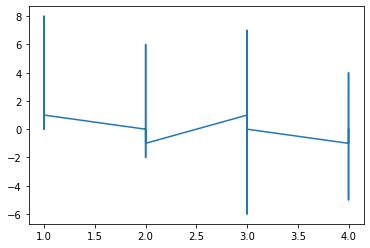

In [8]:
import matplotlib.pyplot as plt
from hmmlearn import hmm
plt.plot(df["stage"], df["40"])

In [36]:
X = df[["40"]].values
from scipy.stats import poisson
from hmmlearn import hmm
# Build the HMM model and fit to the good price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)
print("Unique states:")
print(states)
print("\nStart probabilities:")
print(model.startprob_)
print("\nTransition matrix:")
print(model.transmat_)
print("\nGaussian distribution means:")
print(model.means_)
print("\nGaussian distribution covariances:")
print(model.covars_)


Unique states:
[1 0 2]

Start probabilities:
[0.00000000e+00 1.00000000e+00 1.26247908e-18]

Transition matrix:
[[0.55119172 0.33400588 0.1148024 ]
 [0.64409901 0.34858407 0.00731692]
 [0.49255945 0.07840403 0.42903652]]

Gaussian distribution means:
[[0.        ]
 [1.14519739]
 [0.67170587]]

Gaussian distribution covariances:
[[[7.06234336e-05]]

 [[1.61683785e+00]]

 [[1.19252701e+01]]]


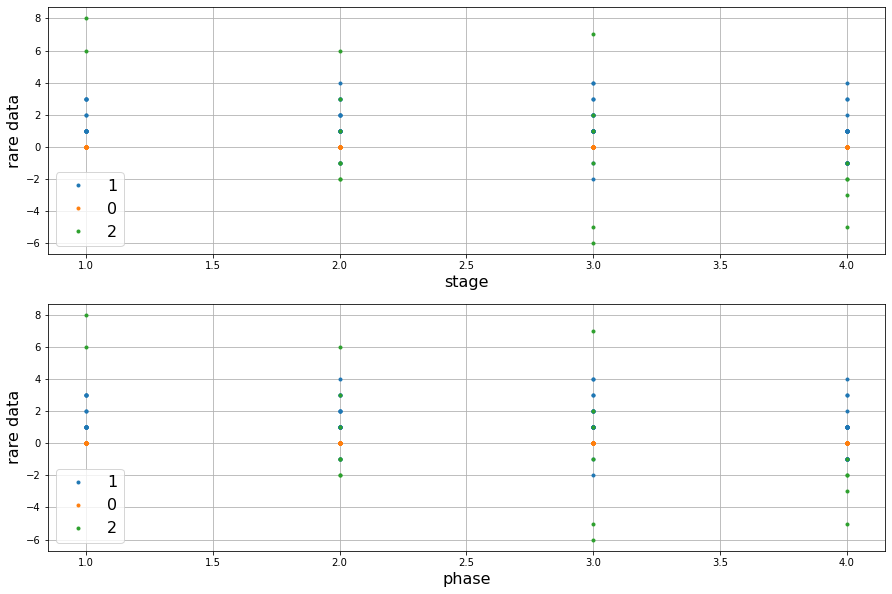

In [40]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = df["stage"].iloc[want]
    y = df["40"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("stage", fontsize=16)
plt.ylabel("rare data", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = df["stage"].iloc[want]
    y = df["40"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("phase", fontsize=16)
plt.ylabel("rare data", fontsize=16)
plt.show()

In [ ]:
pd.merge(df1, df2, how='outer', on='Key')

In [ ]:
df_p2 = df_p1[['username', 'len_40']]
df_p2['p2-p1'] = df_p2['len_40'] - df_p1['len_40']
df_p2['p2-p1']

In [ ]:
df_p3 = df_p2[['username', 'len_40']]
df_p3['p3-p2'] = df_p3['len_40'] - df_p2['len_40']
df_p3['p3-p2']

In [ ]:
df_p4 = df_p3[['username', 'len_40']]
df_p4['p4-p3'] = df_p4['len_40'] - df_p3['len_40']
df_p4['p4-p3']

In [ ]:
df_p2 = df_p1[['username', 'len_40']]
df_p2['p2-p1'] = df_p2['len_40'] - df_p1['len_40']
df_p2['p2-p1']

In [ ]:
df_p5

In [ ]:
df = pd.concat([df_p1, df_p2, df_p3, df_p4, df_p5], axis=1)
df

In [ ]:
new_df = pd.merge(df_p1[['username', 'len_40_1']] , df_p2[['username', 'len_40_2', 'len_data']], how = 'outer', left_on=['username'], right_on = ['username'])
new_df = pd.merge(df_p3[['username', 'len_40_3']], new_df[['username', 'len_40', 'len_data']], how = 'outer', left_on=['username'], right_on = ['username'])
new_df = pd.merge(df_p4[['username', 'len_40_4']], new_df[['username', 'len_40', 'len_data']], how = 'outer', left_on=['username'], right_on = ['username'])
new_df = pd.merge(df_p5[['username', 'len_40_5']], new_df[['username', 'len_40', 'len_data']], how = 'outer', left_on=['username'], right_on = ['username'])
new_df

In [ ]:
dfs = [df.set_index(['phase', 'username', 'len_40', 'len_data']) for df in [df_p1, df_p2, df_p3, df_p4, df_p5]]
pd.concat(dfs, axis=1).reset_index()